In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from shapely.geometry import Point, LineString
from scipy.stats import lognorm, norm

earth_radius = 6731
bank_of_england_coordinates = (51.514171,-0.088438)
satellite_path_coordinates = ((51.451000,-0.300000), (51.560000, 0.000000))
thames_coordinates = [(51.489467,-0.236313),(51.468045,-0.216379),(51.464141,-0.190458),(51.473257,-0.179515),(51.480661,-0.173850),(51.484590,-0.148573),(51.483601,-0.137501)]

In [2]:
def gaussian_probability(distance, sigma):
  return (1/np.sqrt(2 * np.pi * sigma**2)) * np.exp(- (distance - 0)**2 / (2 * sigma**2))

def lognormal_probability(distance, mean, mode):
  sigma = np.sqrt(np.log(mean/mode))
  return lognorm.pdf(distance, s=sigma, loc=0, scale=mean)

def normal_probability(distance, mean, sigma):
  return norm.pdf(distance, loc=mean, scale=sigma)

In [3]:
# Convert coordinates to meters using Haversine formula
lon,lat = np.meshgrid(np.linspace(-0.4,0.4,1000), np.linspace(51.4,51.7,1000))
x = np.cos(lat) * np.cos(lon) * earth_radius * 1000
y = np.cos(lat) * np.sin(lon) * earth_radius * 1000

# Calculate the distances
thames_line = LineString(thames_coordinates)
bank_of_england_point = Point(bank_of_england_coordinates)
satellite_path_line = LineString(satellite_path_coordinates)

# Convert the shapely 'Point' to its coordinates
bank_of_england_point = np.array([bank_of_england_coordinates])

# Now, you can apply the cdist function
dist_bank = cdist(np.vstack((x.ravel(), y.ravel())).T, bank_of_england_point).reshape(x.shape)

dist_thames = np.array([thames_line.distance(Point(p)) for p in zip(x.ravel(), y.ravel())]).reshape(x.shape)
#dist_bank = cdist(np.vstack((x.ravel(), y.ravel())).T, [bank_of_england_point]).reshape(x.shape)
dist_satellite = np.array([satellite_path_line.distance(Point(p)) for p in zip(x.ravel(), y.ravel())]).reshape(x.shape)

KeyboardInterrupt: 

In [5]:
# Calculate the probability densities
prob_thames = gaussian_probability(dist_thames, 2730)
prob_bank = lognormal_probability(dist_bank, 4744, 3777)
prob_satellite = normal_probability(dist_satellite, 0, 3160)

# Joint probability
joint_prob = prob_thames * prob_bank * prob_satellite
# Index of the maximum probability
max_prob_idx = np.unravel_index(np.argmax(joint_prob, axis=None), joint_prob.shape)

# The coordinates of the researcher's location
researcher_location = (lat[max_prob_idx], lon[max_prob_idx])

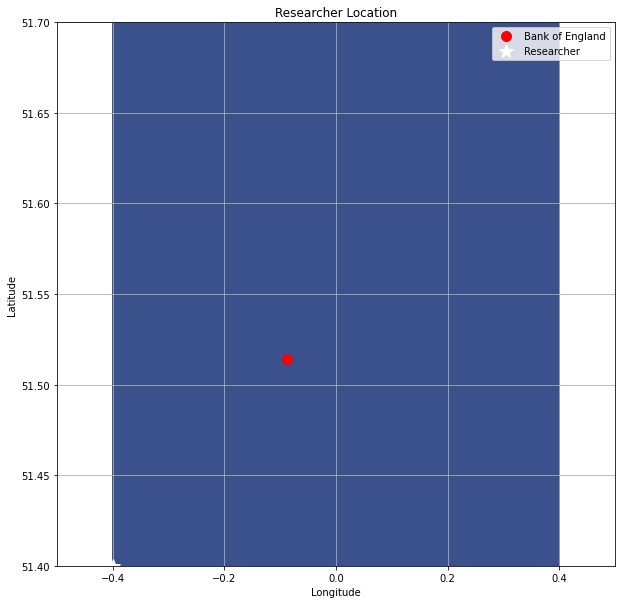

In [11]:
plt.figure(figsize=(10,10))
plt.contourf(lon, lat, joint_prob, 100, cmap='viridis')
plt.plot(*bank_of_england_coordinates[::-1], 'ro', markersize=10, label='Bank of England')
#plt.plot(*zip(list(thames_coordinates))[::-1], 'b-', label='Thames River')
#plt.plot(*zip(list(satellite_path_coordinates))[::-1], 'g-', label='Satellite Path')
plt.plot(*researcher_location[::-1], 'w*', markersize=15, label='Researcher')
plt.legend()
plt.title('Researcher Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.xlim([-0.5, 0.5])
plt.grid(True)
plt.show()

In [10]:
researcher_location[::-1]

(-0.4, 51.4)